# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(f"Number of cities in the list: {cities}")

Number of cities in the list: 610
Number of cities in the list: ['busselton', 'jibuti', 'bredasdorp', 'beihai', 'fortuna', 'tasiilaq', 'bluff', 'ichchapuram', 'bambous virieux', 'puerto escondido', 'les cayes', 'mataura', 'mbaiki', 'harper', 'nacala', 'kapaa', 'colares', 'deputatskiy', 'kruisfontein', 'longyearbyen', 'atuona', 'bengkulu', 'trincomalee', 'haines junction', 'samarai', 'xuddur', 'castro', 'qaanaaq', 'saint-philippe', 'sitka', 'belushya guba', 'richards bay', 'nizhneyansk', 'mar del plata', 'rocky mountain house', 'jurm', 'uruzgan', 'port alfred', 'kamenka', 'carnarvon', 'rikitea', 'burias', 'yellowknife', 'huarmey', 'cabo san lucas', 'albany', 'aflu', 'seoul', 'vaini', 'ushuaia', 'punta arenas', 'tautira', 'thompson', 'jamestown', 'kyren', 'pachino', 'saint-pierre', 'teya', 'hilo', 'leningradskiy', 'ixtapa', 'husavik', 'satitoa', 'shubarshi', 'esna', 'kloulklubed', 'avera', 'lompoc', 'fort nelson', 'thilogne', 'norman wells', 'aguada de pasajeros', 'butaritari', 'boueni',

In [27]:

# #Test Code
# url = 'http://api.openweathermap.org/data/2.5/weather?'
# #city='purushottampur'
# city='chokurdakh'
# city_url =  url + "appid=" + weather_api_key + "&q=" + city
# print(city_url)
# weather_response = requests.get(city_url)
# weather_json = weather_response.json()
# weather_json


#http://api.openweathermap.org/data/2.5/weather?appid=284352926c7f2752219fd8f656493c42&q=chokurdakh


http://api.openweathermap.org/data/2.5/weather?appid=284352926c7f2752219fd8f656493c42&q=chokurdakh


{'coord': {'lon': 147.9167, 'lat': 70.6333},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 232.56,
  'feels_like': 225.71,
  'temp_min': 232.56,
  'temp_max': 232.56,
  'pressure': 1018,
  'humidity': 100,
  'sea_level': 1018,
  'grnd_level': 1014},
 'visibility': 10000,
 'wind': {'speed': 1.35, 'deg': 182, 'gust': 1.3},
 'clouds': {'all': 42},
 'dt': 1677054051,
 'sys': {'country': 'RU', 'sunrise': 1677017819, 'sunset': 1677047233},
 'timezone': 39600,
 'id': 2126123,
 'name': 'Chokurdakh',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
#cities=['sao felix do xingu']

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "appid=" + weather_api_key + "&q=" + city
    #print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        weather_json = weather_response.json()
        #print(weather_json)


        city_weather = weather_json['name']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat= weather_json['coord']['lat']
        city_lng= weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind'] ['speed']
        city_country = weather_json['sys'] ['country']
        city_date = weather_json['dt']
        
        
        ##Debug
        #print(f'The debug is {record_count}. City Max temp: {city_max_temp}, Humidity: {city_humidity}, Clouds: {city_clouds}')
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | jibuti
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | beihai
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | ichchapuram
Processing Record 9 of Set 1 | bambous virieux
Processing Record 10 of Set 1 | puerto escondido
Processing Record 11 of Set 1 | les cayes
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | mbaiki
Processing Record 14 of Set 1 | harper
Processing Record 15 of Set 1 | nacala
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | colares
Processing Record 18 of Set 1 | deputatskiy
Processing Record 19 of Set 1 | kruisfontein
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | bengkulu
Processing Record 23 of Set 1 | tri

Processing Record 33 of Set 4 | guozhen
Processing Record 34 of Set 4 | provideniya
Processing Record 35 of Set 4 | baykit
Processing Record 36 of Set 4 | kaitangata
Processing Record 37 of Set 4 | pisco
Processing Record 38 of Set 4 | tommot
Processing Record 39 of Set 4 | fukue
Processing Record 40 of Set 4 | bantry
Processing Record 41 of Set 4 | buala
Processing Record 42 of Set 4 | afmadu
City not found. Skipping...
Processing Record 43 of Set 4 | qax
Processing Record 44 of Set 4 | nikolskoye
Processing Record 45 of Set 4 | comodoro rivadavia
Processing Record 46 of Set 4 | sarkand
Processing Record 47 of Set 4 | pacific grove
Processing Record 48 of Set 4 | miami
Processing Record 49 of Set 4 | cayenne
Processing Record 0 of Set 5 | flinders
Processing Record 1 of Set 5 | hofn
Processing Record 2 of Set 5 | smithers
Processing Record 3 of Set 5 | monte alegre
Processing Record 4 of Set 5 | mayenne
Processing Record 5 of Set 5 | sola
Processing Record 6 of Set 5 | vrangel
Process

Processing Record 27 of Set 8 | catalao
Processing Record 28 of Set 8 | mitsamiouli
Processing Record 29 of Set 8 | bad frankenhausen
Processing Record 30 of Set 8 | beloha
Processing Record 31 of Set 8 | bilma
Processing Record 32 of Set 8 | imatra
Processing Record 33 of Set 8 | omsukchan
Processing Record 34 of Set 8 | pedasi
Processing Record 35 of Set 8 | nuuk
Processing Record 36 of Set 8 | boa vista
Processing Record 37 of Set 8 | temaraia
City not found. Skipping...
Processing Record 38 of Set 8 | caravelas
Processing Record 39 of Set 8 | barranca
Processing Record 40 of Set 8 | damaturu
Processing Record 41 of Set 8 | lunenburg
Processing Record 42 of Set 8 | lata
Processing Record 43 of Set 8 | grand centre
City not found. Skipping...
Processing Record 44 of Set 8 | sirari
Processing Record 45 of Set 8 | inhambane
Processing Record 46 of Set 8 | fairbanks
Processing Record 47 of Set 8 | belaya gora
Processing Record 48 of Set 8 | guerrero negro
Processing Record 49 of Set 8 |

City not found. Skipping...
Processing Record 18 of Set 12 | abomsa
Processing Record 19 of Set 12 | macomer
Processing Record 20 of Set 12 | coshocton
Processing Record 21 of Set 12 | xiaoweizhai
Processing Record 22 of Set 12 | nome
Processing Record 23 of Set 12 | khryashchevka
Processing Record 24 of Set 12 | cockburn town
Processing Record 25 of Set 12 | fare
Processing Record 26 of Set 12 | bubaque
Processing Record 27 of Set 12 | la libertad
Processing Record 28 of Set 12 | yinchuan
Processing Record 29 of Set 12 | hamadan
Processing Record 30 of Set 12 | balgazyn
Processing Record 31 of Set 12 | itaituba
Processing Record 32 of Set 12 | evensk
Processing Record 33 of Set 12 | san cristobal
Processing Record 34 of Set 12 | polyarnyy
Processing Record 35 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 36 of Set 12 | kudahuvadhoo
Processing Record 37 of Set 12 | pa sang
Processing Record 38 of Set 12 | svetlaya
Processing Record 39 of Set 12 | kununurra
Process

In [5]:
print(city_data)

[{'City': 'busselton', 'Lat': -33.65, 'Lng': 115.3333, 'Max Temp': 298.92, 'Humidity': 46, 'Cloudiness': 6, 'Wind Speed': 8.22, 'Country': 'AU', 'Date': 1677053048}, {'City': 'jibuti', 'Lat': 11.5, 'Lng': 42.5, 'Max Temp': 298.36, 'Humidity': 39, 'Cloudiness': 8, 'Wind Speed': 7.65, 'Country': 'DJ', 'Date': 1677053136}, {'City': 'bredasdorp', 'Lat': -34.5322, 'Lng': 20.0403, 'Max Temp': 293.41, 'Humidity': 56, 'Cloudiness': 52, 'Wind Speed': 2.47, 'Country': 'ZA', 'Date': 1677053137}, {'City': 'beihai', 'Lat': 21.4833, 'Lng': 109.1, 'Max Temp': 294.1, 'Humidity': 63, 'Cloudiness': 1, 'Wind Speed': 5.28, 'Country': 'CN', 'Date': 1677053138}, {'City': 'fortuna', 'Lat': 40.5982, 'Lng': -124.1573, 'Max Temp': 275.89, 'Humidity': 97, 'Cloudiness': 100, 'Wind Speed': 0.45, 'Country': 'US', 'Date': 1677053139}, {'City': 'tasiilaq', 'Lat': 65.6145, 'Lng': -37.6368, 'Max Temp': 266.24, 'Humidity': 90, 'Cloudiness': 100, 'Wind Speed': 5.69, 'Country': 'GL', 'Date': 1677053140}, {'City': 'bluff',

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data,columns=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])

# Show Record Count
print(city_data_df.count())
city_data_df

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,298.92,46,6,8.22,AU,1677053048
1,jibuti,11.5000,42.5000,298.36,39,8,7.65,DJ,1677053136
2,bredasdorp,-34.5322,20.0403,293.41,56,52,2.47,ZA,1677053137
3,beihai,21.4833,109.1000,294.10,63,1,5.28,CN,1677053138
4,fortuna,40.5982,-124.1573,275.89,97,100,0.45,US,1677053139
...,...,...,...,...,...,...,...,...,...
557,broken hill,-31.9500,141.4333,307.26,21,9,6.17,AU,1677053701
558,aleppo,36.2500,37.5000,285.04,68,2,0.95,SY,1677053702
559,san quintin,30.4833,-115.9500,286.63,86,100,7.46,MX,1677053663
560,kyra,49.5776,111.9753,269.29,61,87,6.73,RU,1677053704


In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,298.92,46,6,8.22,AU,1677053048
1,jibuti,11.5000,42.5000,298.36,39,8,7.65,DJ,1677053136
2,bredasdorp,-34.5322,20.0403,293.41,56,52,2.47,ZA,1677053137
3,beihai,21.4833,109.1000,294.10,63,1,5.28,CN,1677053138
4,fortuna,40.5982,-124.1573,275.89,97,100,0.45,US,1677053139


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,298.92,46,6,8.22,AU,1677053048
1,jibuti,11.5000,42.5000,298.36,39,8,7.65,DJ,1677053136
2,bredasdorp,-34.5322,20.0403,293.41,56,52,2.47,ZA,1677053137
3,beihai,21.4833,109.1000,294.10,63,1,5.28,CN,1677053138
4,fortuna,40.5982,-124.1573,275.89,97,100,0.45,US,1677053139


In [10]:
#Create a function to plot scatter plot
def show_scatter_plot(x, y, title, x_label, y_label):
    df = pd.DataFrame({'x': x, 'y': y})
    ax = df.plot.scatter(x='x', y='y')
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.show()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

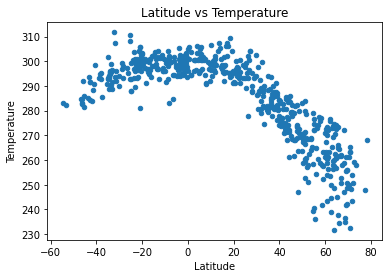

<Figure size 432x288 with 0 Axes>

In [11]:
# Build scatter plot for latitude vs. temperature
# create a scatter plot
x=city_data_df['Lat']
y=city_data_df['Max Temp']
show_scatter_plot(x, y, 'Latitude vs Temperature', 'Latitude', 'Temperature')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
# plt.show()

#### Latitude Vs. Humidity

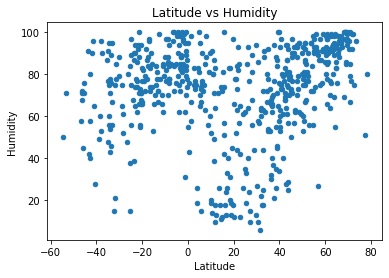

<Figure size 432x288 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. humidity
x=city_data_df['Lat']
y=city_data_df['Humidity']
show_scatter_plot(x, y, 'Latitude vs Humidity', 'Latitude', 'Humidity')


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
# plt.show()

#### Latitude Vs. Cloudiness

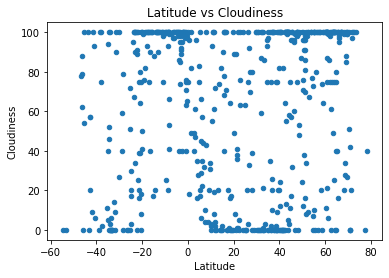

<Figure size 432x288 with 0 Axes>

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x=city_data_df['Lat']
y=city_data_df['Cloudiness']
show_scatter_plot(x, y, 'Latitude vs Cloudiness', 'Latitude', 'Cloudiness')


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
# plt.show()

#### Latitude vs. Wind Speed Plot

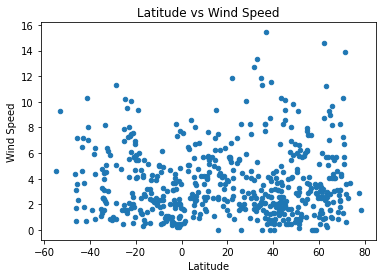

<Figure size 432x288 with 0 Axes>

In [14]:
# Build the scatter plots for latitude vs. wind speed
x=city_data_df['Lat']
y=city_data_df['Wind Speed']
show_scatter_plot(x, y, 'Latitude vs Wind Speed', 'Latitude', 'Wind Speed')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
# plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
import seaborn as sns

def create_linear_regression_plot(x_data, y_data, x_label, y_label, title):
    sns.regplot(x=x_data, y=y_data)
    
#      # Run linear regression
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
#     regress_values = x_data * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
#     # Plot scatter plot
#     plt.scatter(x_data,y_data)
    
#     # Plot regression line
#     plt.plot(x_data,regress_values,"r-")
#     plt.annotate(line_eq,(275,70),fontsize=15,color="red")
    
    # Print r square value
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    print(f"R squared: {rvalue**2}")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [16]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,298.92,46,6,8.22,AU,1677053048
1,jibuti,11.5000,42.5000,298.36,39,8,7.65,DJ,1677053136
2,bredasdorp,-34.5322,20.0403,293.41,56,52,2.47,ZA,1677053137
3,beihai,21.4833,109.1000,294.10,63,1,5.28,CN,1677053138
4,fortuna,40.5982,-124.1573,275.89,97,100,0.45,US,1677053139
...,...,...,...,...,...,...,...,...,...
557,broken hill,-31.9500,141.4333,307.26,21,9,6.17,AU,1677053701
558,aleppo,36.2500,37.5000,285.04,68,2,0.95,SY,1677053702
559,san quintin,30.4833,-115.9500,286.63,86,100,7.46,MX,1677053663


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jibuti,11.5000,42.5000,298.36,39,8,7.65,DJ,1677053136
3,beihai,21.4833,109.1000,294.10,63,1,5.28,CN,1677053138
4,fortuna,40.5982,-124.1573,275.89,97,100,0.45,US,1677053139
5,tasiilaq,65.6145,-37.6368,266.24,90,100,5.69,GL,1677053140
7,ichchapuram,19.1167,84.7000,304.34,45,0,6.38,IN,1677053142


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,298.92,46,6,8.22,AU,1677053048
2,bredasdorp,-34.5322,20.0403,293.41,56,52,2.47,ZA,1677053137
6,bluff,-46.6000,168.3333,284.71,58,78,4.33,NZ,1677052875
8,bambous virieux,-20.3428,57.7575,303.29,66,75,5.66,MU,1677053142
11,mataura,-46.1927,168.8643,284.53,71,88,0.71,NZ,1677053145


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7813214636441956


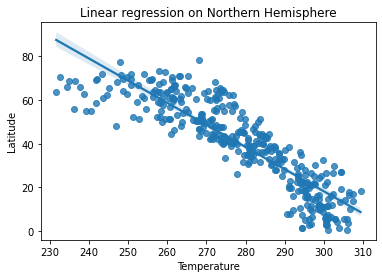

In [19]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x=northern_hemi_df['Max Temp'].values
y=northern_hemi_df['Lat'].values
create_linear_regression_plot(x, y, 'Temperature', 'Latitude', 'Linear regression on Northern Hemisphere')


R squared: 0.2531905595885868


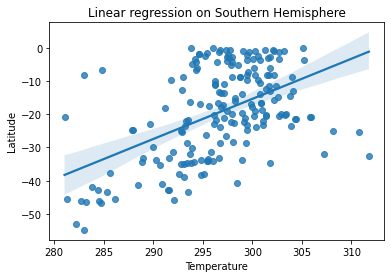

In [20]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x=southern_hemi_df['Max Temp']
y=southern_hemi_df['Lat']
create_linear_regression_plot(x, y, 'Temperature', 'Latitude', 'Linear regression on Southern Hemisphere')

### Temperature vs. Latitude Linear Regression Plot.
1) In Northern Hemisphere , roughly 71% of Temperature rise can be explained by Latitude.
2) In Sourthern Hemisphere ,roughly 37% of Temperature rise can be explained by Latitude.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.2252139523741398


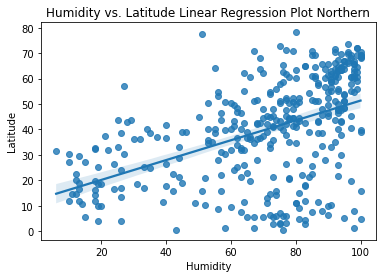

In [21]:
# Northern Hemisphere
x=northern_hemi_df['Humidity']
y=northern_hemi_df['Lat']
create_linear_regression_plot(x, y, 'Humidity', 'Latitude', 'Humidity vs. Latitude Linear Regression Plot Northern')

R squared: 0.15186590996202592


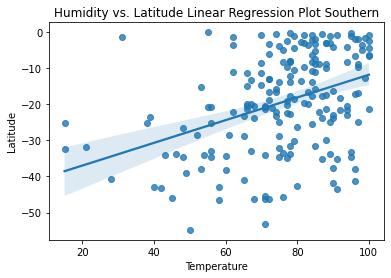

In [22]:
# Southern Hemisphere
x=southern_hemi_df['Humidity']
y=southern_hemi_df['Lat']
create_linear_regression_plot(x, y, 'Temperature', 'Latitude', 'Humidity vs. Latitude Linear Regression Plot Southern')

### Humidity vs. Latitude Linear Regression Plot
1) In Northern Hemisphere , roughly 16% of Humidity rise can be explained by Latitude.
2) In Sourthern Hemisphere ,roughly 6% of Humidity rise can be explained by Latitude.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.0885863092799575


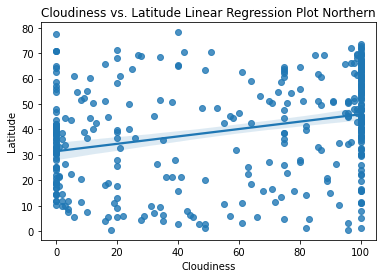

In [23]:
# Northern Hemisphere
x=northern_hemi_df['Cloudiness']
y=northern_hemi_df['Lat']
create_linear_regression_plot(x, y, 'Cloudiness', 'Latitude', 'Cloudiness vs. Latitude Linear Regression Plot Northern')

R squared: 0.24309875814084317


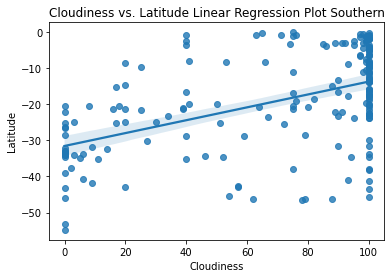

In [24]:
# Southern Hemisphere
x=southern_hemi_df['Cloudiness']
y=southern_hemi_df['Lat']
create_linear_regression_plot(x, y, 'Cloudiness', 'Latitude', 'Cloudiness vs. Latitude Linear Regression Plot Southern')

### Cloudiness vs. Latitude Linear Regression Plot
1) In Northern Hemisphere , roughly 8% of Cloudiness can be explained by Latitude.
2) In Sourthern Hemisphere ,roughly 9% of Cloudiness rise can be explained by Latitude.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.0008845666849326933


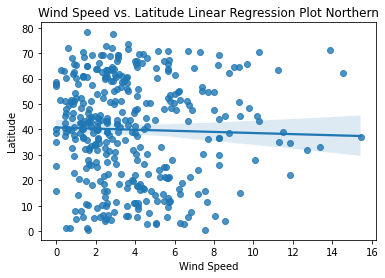

In [25]:
# Northern Hemisphere
x=northern_hemi_df['Wind Speed']
y=northern_hemi_df['Lat']
create_linear_regression_plot(x, y, 'Wind Speed', 'Latitude', 'Wind Speed vs. Latitude Linear Regression Plot Northern')

R squared: 0.08364700729287142


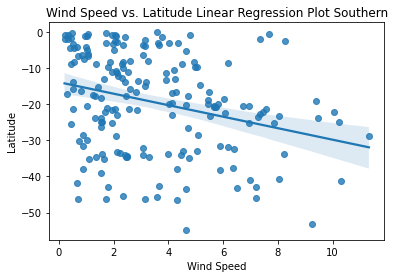

In [26]:
# Southern Hemisphere
x=southern_hemi_df['Wind Speed']
y=southern_hemi_df['Lat']
create_linear_regression_plot(x, y, 'Wind Speed', 'Latitude', 'Wind Speed vs. Latitude Linear Regression Plot Southern')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot
1) Wind speed had negligible impact on increase in Latitude. 